In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt

class opt():
    pass
opt.pltlog=False

data2D = load_data("data/2022-12-08-rat_kidney.npy",to3D=False)
data3D = load_data("data/2022-12-08-rat_kidney.npy",to3D=True)

c:\Users\wvand\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Opening data/2022-12-08-rat_kidney.npy
Converting data to array of 208297 spectra with 573 mass bins.
After removing empty spectra, 161547 sectra remain.
Opening data/2022-12-08-rat_kidney.npy
Converting data to image of 361 by 577 pixels with 573 mass bins.


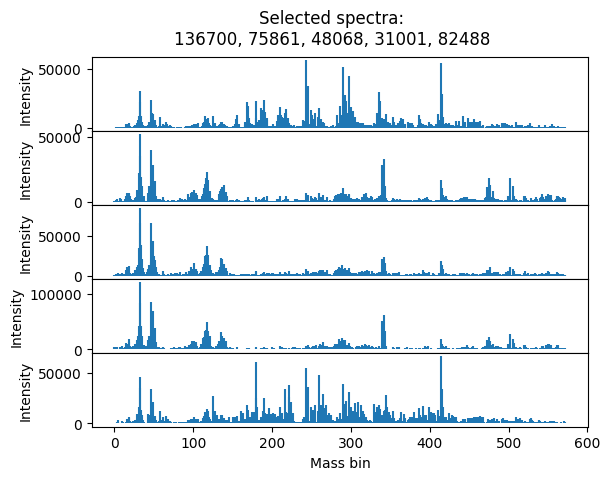

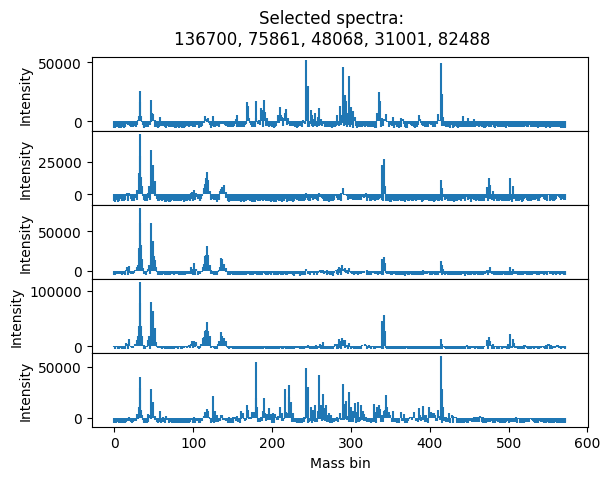

<module 'matplotlib.pyplot' from 'c:\\Users\\wvand\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [2]:
randomspec = np.random.randint(0,len(data2D),size=5)
plot_spect(data2D,randomspec)

tot_mean = np.mean(data2D)
plot_spect(data2D-tot_mean,randomspec)


(161547, 573)


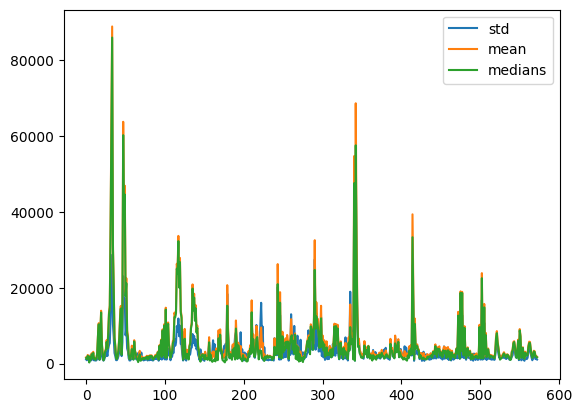

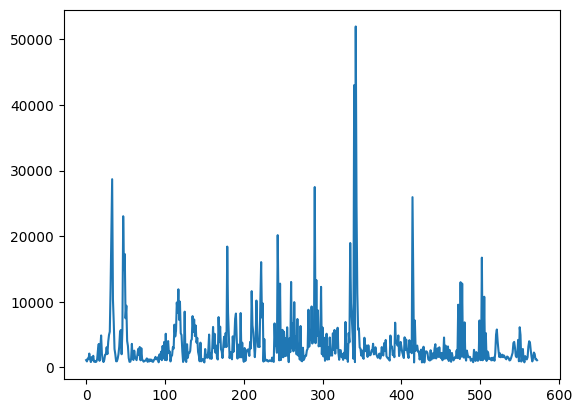

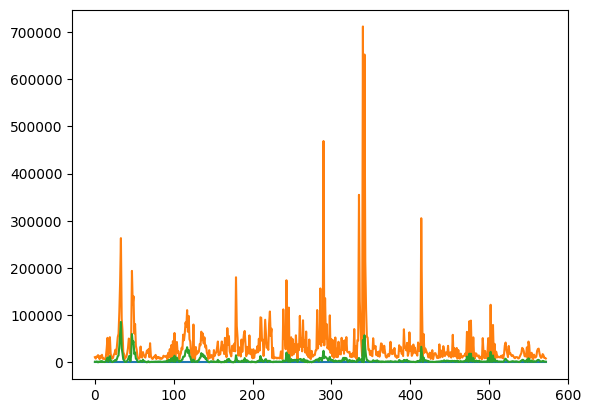

In [3]:
# data2D = data2D[:,:50]

print(np.shape(data2D))
# print(np.shape(np.mean(data2D,axis=0)))
stds = np.std(data2D,axis=0)
means = np.mean(data2D,axis=0)
medians = np.median(data2D,axis=0)
vars = np.var(data2D,axis=0)
mins = np.min(data2D,axis=0)
maxs = np.max(data2D,axis=0)

plt.plot(stds)
plt.plot(means)
plt.plot(medians)
plt.legend(['std','mean','medians'])
plt.show()

plt.plot(stds)
plt.show()

plt.plot(mins)
plt.plot(maxs)
plt.plot(medians)
plt.show()

C:\Users\wvand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\wvand\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


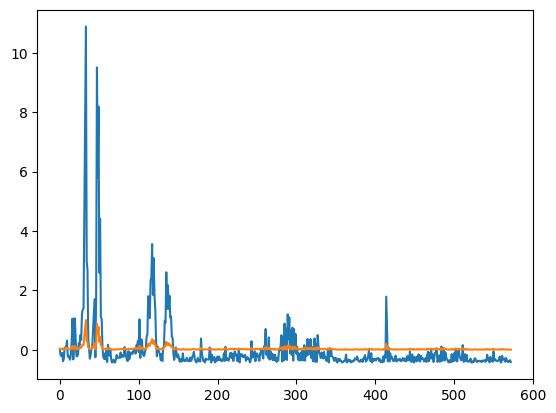

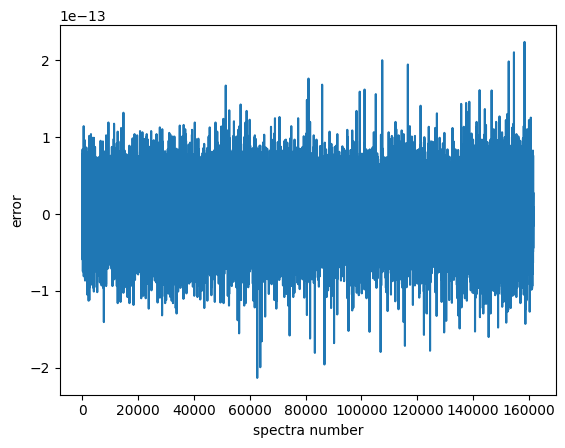

-573
(161547, 573) (161547, 573)


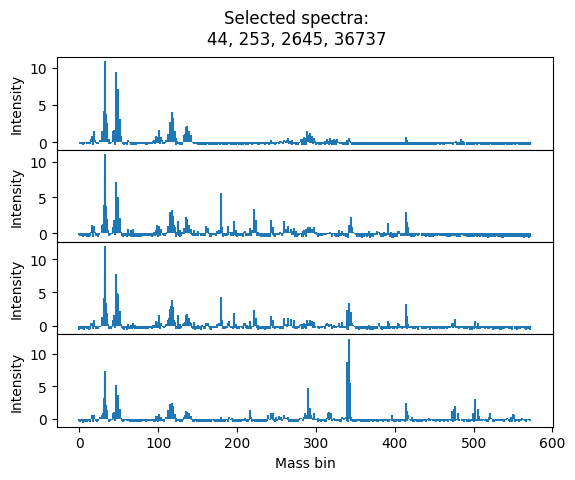

<module 'matplotlib.pyplot' from 'c:\\Users\\wvand\\AppData\\Local\\Programs\\Python\\Python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [4]:
mean = np.mean(data2D,axis=1)
std = np.std(data2D,axis=1)

normalized = np.zeros(np.shape(data2D))
normalized[0,:]=((data2D[0,:]-mean[0])/std[0])
for i in range(len(mean)):
    normalized[i,:]=((data2D[i,:]-mean[i])/std[i])

minmaxed = np.zeros(np.shape(data2D))
minmaxed[0,:] = (data2D[0,:]-min(data2D[0,:]))/(max(data2D[0,:]-min(data2D[0,:])))
for i in range(len(mean)):
    minmaxed[i,:] = (data2D[i,:]-min(data2D[i,:]))/(max(data2D[i,:]-min(data2D[i,:])))#*2-1 #*2-1 for tanh

plt.plot(normalized[0])
plt.plot(minmaxed[0])
plt.show()

recovered = np.zeros(np.shape(data2D))
for i in range(len(mean)):
    recovered[i]=(normalized[i,:]*std[i])+mean[i]

plt.plot(np.mean(data2D-recovered,axis=1))
plt.ylabel('error')
plt.xlabel('spectra number')
plt.show()
print(np.sum(abs(data2D-recovered)<=0.0001)-np.shape(data2D)[0]*np.shape(data2D)[1])
print(np.shape(recovered),np.shape(normalized))
plot_spect(normalized,[44,253,2645,36737])

In [5]:
randomslice = np.random.randint(0,len(data3D))

In [6]:
def get_labels(path):
    with np.load(path,allow_pickle=True) as nmfdata:
        w = nmfdata['w']
        h = nmfdata['h']
    classes = []
    for i in range(len(w)):
        wline = w[i]
        classes.append(np.argmax(w[i]))
    return classes
labels = get_labels('data/orthogonal_nmf.npz')


In [7]:
classes_set = set(classes)
print(classes_set)

occurences = []
for i in classes_set:
    print("Class %i occurs %i times" %(i,classes.count(i)))
    occurences.append(classes.count(i))
plt.hist(classes,bins=len(occurences))
plt.show()

NameError: name 'classes' is not defined